<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-Electric-Vehicle(EV)-chargepoints-in-England" data-toc-modified-id="Predicting-Electric-Vehicle(EV)-chargepoints-in-England-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predicting Electric Vehicle(EV) chargepoints in England</a></span><ul class="toc-item"><li><span><a href="#Modelling" data-toc-modified-id="Modelling-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Splitting-dataframe-into-features-and-target-|-converting-target-to-binary-for-classification" data-toc-modified-id="Splitting-dataframe-into-features-and-target-|-converting-target-to-binary-for-classification-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Splitting dataframe into features and target | converting target to binary for classification</a></span><ul class="toc-item"><li><span><a href="#Train-test-split-(80%-Train,-20%-Test)" data-toc-modified-id="Train-test-split-(80%-Train,-20%-Test)-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Train-test-split (80% Train, 20% Test)</a></span></li></ul></li><li><span><a href="#Building-classifier-pipeline" data-toc-modified-id="Building-classifier-pipeline-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Building classifier pipeline</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Gaussian-Naive-Bayes" data-toc-modified-id="Gaussian-Naive-Bayes-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Gaussian Naive Bayes</a></span></li><li><span><a href="#Support-Vectors" data-toc-modified-id="Support-Vectors-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Support Vectors</a></span></li><li><span><a href="#K-Nearest-Neighbours" data-toc-modified-id="K-Nearest-Neighbours-1.1.7"><span class="toc-item-num">1.1.7&nbsp;&nbsp;</span>K Nearest Neighbours</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.1.8"><span class="toc-item-num">1.1.8&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-1.1.9"><span class="toc-item-num">1.1.9&nbsp;&nbsp;</span>Neural Network</a></span></li><li><span><a href="#Splitting-dataframe-into-features-and-target" data-toc-modified-id="Splitting-dataframe-into-features-and-target-1.1.10"><span class="toc-item-num">1.1.10&nbsp;&nbsp;</span>Splitting dataframe into features and target</a></span><ul class="toc-item"><li><span><a href="#Train-test-split-(80%-Train,-20%-Test)" data-toc-modified-id="Train-test-split-(80%-Train,-20%-Test)-1.1.10.1"><span class="toc-item-num">1.1.10.1&nbsp;&nbsp;</span>Train-test-split (80% Train, 20% Test)</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Predicting Electric Vehicle(EV) chargepoints in England
## Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import joblib
import pickle

#Sklearn packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder,MinMaxScaler,PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression,RidgeCV,LassoCV,ElasticNetCV,LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,classification_report
import scikitplot as skplt
from scikitplot.metrics import plot_confusion_matrix


from sklearn.base import BaseEstimator, TransformerMixin

import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline,FeatureUnion,make_pipeline,make_union

df = pd.read_csv("../data/processed/full_processed_data.csv")\

df.head()

,msoa11cd,msoa11nm,lad13cd,lad13nm,income_score,employment_score,idaci_score,idaopi_score,adultskills_score,health_score,...,elec_d_con_mdn,elec_nd_con,nd_meters,elec_nd_con_mean,elec_nd_con_mdn,residential_ratio,residential_meter_ratio,residential_mdn_ratio,metropolitan,charge_points
0,E02006765,Wychavon 018,E07000238,Wychavon,-0.605381,-0.573660,-0.637344,-0.902425,-0.217255,-0.836885,...,1.017437,0.685358,0.519989,-0.305450,-0.400422,-0.696956,-0.823383,0.896452,0.0,6.0
1,E02006869,Sheffield 076,E08000019,Sheffield,0.346551,0.581285,0.225006,0.495515,0.865269,0.722658,...,-0.663149,-0.825844,-0.352399,0.852006,1.267850,1.225788,0.884991,-1.552253,1.0,0.0
2,E02006774,Wyre Forest 008,E07000239,Wyre Forest,0.274137,0.279842,0.104888,0.287807,0.408271,0.034357,...,-0.030677,-0.620824,-1.015851,-1.369678,-1.227389,0.641165,1.133435,1.119902,0.0,0.0
3,E02000996,Bolton 013,E08000001,Bolton,1.922412,2.012535,1.799706,1.343843,1.607318,1.823455,...,-0.045924,-1.215959,-1.019551,0.271194,0.405159,1.355991,1.184134,-0.464230,1.0,0.0
4,E02006606,Mid Sussex 003,E07000228,Mid Sussex,-1.616707,-2.045091,-1.505672,-1.429771,-0.683208,-2.137470,...,0.482730,-1.200421,-1.444683,-1.112559,-0.868930,1.468005,1.585986,1.041607,0.0,0.0


### Splitting dataframe into features and target | converting target to binary for classification

In [2]:
X = df.drop(['charge_points'], axis=1)
X = X.loc[:, 'income_score':]
y = df.charge_points.apply(lambda x: 1 if x > 0 else 0).values

In [3]:
pd.DataFrame(y.reshape(-1,1)).iloc[:,0].value_counts(normalize=True)

0    0.556766
1    0.443234
Name: 0, dtype: float64

In [ ]:
pipe_cat = Pipeline(steps=[('selector',TypeSelector('category')),
                       ('encoder',OneHotEncoder(categories = "auto",sparse=False,handle_unknown='ignore'))])

pipe_num = Pipeline(steps=[('selector',TypeSelector(np.number)),
                       ('scaler',StandardScaler())])

feat_u = FeatureUnion(n_jobs=1, transformer_list=[('pipenum',pipe_num),('pipecat',pipe_cat)])

#### Train-test-split (80% Train, 20% Test)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True, stratify=y)

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

model = sm.Logit(y,X)
results = model.fit()
results.summary()
#get_col_names(df)

Optimization terminated successfully.
         Current function value: 0.526417
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6791
Model:                          Logit   Df Residuals:                     6662
Method:                           MLE   Df Model:                          128
Date:                Mon, 02 Mar 2020   Pseudo R-squ.:                  0.2334
Time:                        01:10:27   Log-Likelihood:                -3574.9
converged:                       True   LL-Null:                       -4663.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
income_score               -0.0258      0.483     -0.053      0.957      -0.972       0.920
employment_score           -0.0540      0.231     -0.234      0.815      -0.506       0.398
idaci_score                 0.0073      0.209      0.035      0.972      -0.403       0.417
idaopi_score                0.2171      0.195      1.111      0.266      -0.166       0.600
adultskills_score          -0.4277      0.106     -4.043      0.000      -0.635      -0.220
health_score               -0.0392      0.104     -0.375      0.707      -0.244       0.166
crime_score                -0.0016      0.061     -0.027      0.979      -0.122       0.118
chanyp_score                0.0268      0.078      0.345      0.730      -0.125       0.179
geo_bar_score               0.1304      0.061      2.147      0.032       0.011       0.249
widerbar_score              0.0160      0.071      0.227      0.821      -0.122       0.154
indoor_score               -0.1055      0.048     -2.177      0.030      -0.200      -0.011
outdoor_score              -0.0798      0.054     -1.466      0.143      -0.187       0.027
total_pop                  -0.0670      0.291     -0.230      0.818      -0.638       0.504
under16_pop                 0.1559      0.119      1.309      0.191      -0.077       0.389
16_59_pop                  -1.5384      0.820     -1.875      0.061      -3.146       0.070
over60_pop                 -0.0160      0.143     -0.112      0.911      -0.296       0.264
workingage_pop              1.5036      0.800      1.881      0.060      -0.064       3.071
total_inc                  -0.2298      0.147     -1.564      0.118      -0.518       0.058
total_netinc                0.0550      0.138      0.400      0.689      -0.215       0.325
total_netb4hsing            0.2874      0.198      1.452      0.146      -0.100       0.675
total_netafterhsing        -0.1233      0.174     -0.711      0.477      -0.463       0.217
walk_work                   0.6449      0.297      2.173      0.030       0.063       1.227
walk_empbus                -0.4778      0.187     -2.562      0.010      -0.843      -0.112
walk_school                -0.2740      0.201     -1.362      0.173      -0.668       0.120
walk_shopping              -0.4776      0.295     -1.621      0.105      -1.055       0.100
walk_personbus              0.3733      0.270      1.383      0.167      -0.156       0.902
walk_social                -0.0548      0.251     -0.219      0.827      -0.546       0.436
walk_friends               -0.2677      0.244     -1.098      0.272      -0.746       0.210
walk_holiday                0.0261      0.194      0.134      0.893      -0.355       0.407
cycle_work                 -0.5495      0.225     -2.444      0.015      -0.990      -0.109
cycle_empbus                0.2048      0.155      1.322      0.186      -0.099       0.508
cycle_school               -0.0023      0.133     -0.017      0.986      -0.263       0.259
cycle_shopping       

### Building classifier pipeline

In [6]:
#Function for executing preprocessing steps then running a classifier of choice
def model_run(model,X_train,y_train,X_test,y_test):
    classifier_pipeline = make_pipeline(
    model)
    classifier_pipeline.fit(X_train,y_train)
    train =classifier_pipeline.score(X_train,y_train)
    test =classifier_pipeline.score(X_test,y_test)
    cross_val = cross_val_score(classifier_pipeline,X_train,y_train,cv=5).mean()
    print(f"Training score: {train:.3f}")
    print(f"Testing score: {test:.3f}")
    print(f"CrossVal score: {cross_val:.3f}")
    return classifier_pipeline
    #return classifier_pipeline.fit()

### Logistic regression

In [8]:
#Running model with Logistic Regression
log_r = LogisticRegression(random_state=0,solver='liblinear')
log_r = model_run(log_r,X_train,y_train,X_test,y_test)

Training score: 0.733
Testing score: 0.725
CrossVal score: 0.714


In [9]:
#Specifying GridSearch parameters
params = {'logisticregression__C': np.logspace(-1,0),
 'logisticregression__fit_intercept': [True],
'logisticregression__class_weight': [None],
 'logisticregression__penalty': ['l2'],
    'logisticregression__verbose': [1],
        'logisticregression__random_state':[0],
          'logisticregression__intercept_scaling': [1]
          
}

In [10]:
grid_log_r = GridSearchCV(log_r,param_grid=params,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)

In [12]:
grid_log_r.fit(X_train,y_train)
joblib.dump(grid_log_r, '../models/logistic_regression_model')

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   33.3s finished


[LibLinear]

['../models/logistic_regression_model']

In [13]:
model_001 = joblib.load('../models/logistic_regression_model')
model_001.best_score_

0.7179630015536027

In [14]:
model_001.best_params_

{'logisticregression__C': 0.21209508879201905,
 'logisticregression__class_weight': None,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 0,
 'logisticregression__verbose': 1}

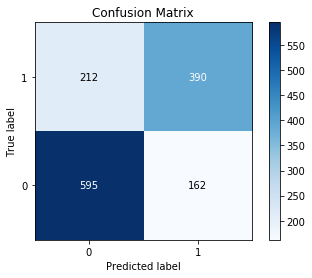

In [15]:
import matplotlib.pyplot as plt
plot_confusion_matrix(y_test,model_001.predict(X_test))
plt.ylim(-0.5,1.5);
#plt.savefig("confusion_logr.jpg",dpi=800)

In [16]:
print(classification_report(y_test,model_001.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       757
           1       0.71      0.65      0.68       602

    accuracy                           0.72      1359
   macro avg       0.72      0.72      0.72      1359
weighted avg       0.72      0.72      0.72      1359



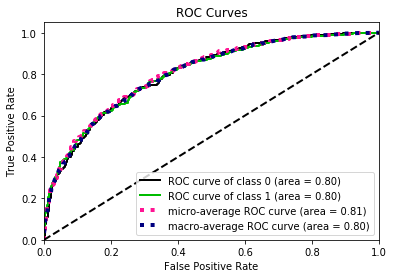

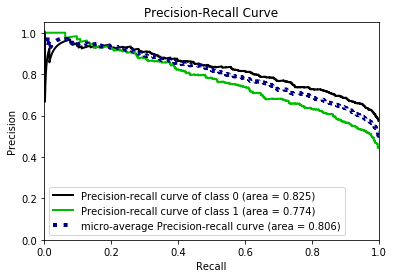

In [17]:
skplt.metrics.plot_roc_curve(y_test,model_001.predict_proba(X_test))
skplt.metrics.plot_precision_recall_curve(y_test,model_001.predict_proba(X_test));

### Decision Tree

In [ ]:
#Running model with DecisionTreeClassifier
d_tree = DecisionTreeClassifier(max_depth=2,random_state=0)
d_tree = model_run(d_tree,X_train,y_train,X_test,y_test)

#Specifying GridSearch parameters
params = {'decisiontreeclassifier__class_weight': [None,'balanced'],
 'decisiontreeclassifier__criterion': ['gini','entropy'],
 'decisiontreeclassifier__max_depth': range(2,10),
 'decisiontreeclassifier__max_features': [None],
 'decisiontreeclassifier__max_leaf_nodes': [None],
 'decisiontreeclassifier__min_impurity_decrease': [0.0],
 'decisiontreeclassifier__min_impurity_split': [None],
 'decisiontreeclassifier__min_samples_leaf': [1],
 'decisiontreeclassifier__min_samples_split': [2],
 'decisiontreeclassifier__min_weight_fraction_leaf': [0.0],
 'decisiontreeclassifier__presort': [False],
 'decisiontreeclassifier__random_state': [0],
 'decisiontreeclassifier__splitter': ['best']}


In [ ]:
grid_d_tree = GridSearchCV(d_tree,param_grid=params,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
grid_d_tree.fit(X_train,y_train)

In [ ]:
grid_d_tree.best_score_

In [ ]:
joblib.dump(grid_d_tree, '../models/decision_tree_model')
model_002 = joblib.load('../models/decision_tree_model')
model_002.best_score_

In [ ]:
plot_confusion_matrix(y_test,model_002.predict(X_test))
plt.ylim(-0.5,1.5)

In [ ]:
print(classification_report(y_test,model_002.predict(X_test)))

In [ ]:
skplt.metrics.plot_roc_curve(y_test,model_002.predict_proba(X_test))
skplt.metrics.plot_precision_recall_curve(y_test,model_002.predict_proba(X_test));

### Gaussian Naive Bayes

In [ ]:
#Running model with DecisionTreeClassifier
gaus_nb =GaussianNB()
gaus_nb = model_run(gaus_nb,X_train,y_train,X_test,y_test)

In [ ]:
joblib.dump(gaus_nb, '../models/gaussian_naivebayes_model')
model_003 = joblib.load('../models/gaussian_naivebayes_model')

In [ ]:
plot_confusion_matrix(y_test,model_003.predict(X_test))
plt.ylim(-0.5,1.5)

In [ ]:
print(classification_report(y_test,model_003.predict(X_test)))

In [ ]:
skplt.metrics.plot_roc_curve(y_test,model_003.predict_proba(X_test))
skplt.metrics.plot_precision_recall_curve(y_test,model_003.predict_proba(X_test));

### Support Vectors

In [ ]:
#Running model with SVM
svc = SVC(random_state=0)
svc = model_run(svc,X_train,y_train,X_test,y_test)

In [ ]:
svc.named_steps['svc']

In [ ]:
#Specifying GridSearch parameters
params = {'svc__C': np.logspace(-1,1,10),
 'svc__class_weight': [None,'balanced'],
 'svc__coef0': [0.0],
 'svc__decision_function_shape': ['ovr'],
 'svc__degree': [3],
 'svc__gamma': ['auto'],
 'svc__kernel': ['rbf'],
 'svc__max_iter': [-1],
 'svc__probability': [True],
 'svc__random_state': [0],
 'svc__shrinking': [True],
 'svc__tol': [0.001],
 'svc__verbose': [1]}


In [ ]:
grid_d_svc = GridSearchCV(svc,param_grid=params,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
grid_d_svc.fit(X_train,y_train)

In [ ]:
joblib.dump(grid_d_svc, 'grid_svc')
model_004 = joblib.load('grid_svc')
model_004.best_score_

In [ ]:
model_004.best_params_

In [ ]:
plot_confusion_matrix(y_test,model_004.predict(X_test))
plt.ylim(-0.5,1.5)

In [ ]:
print(classification_report(y_test,model_004.predict(X_test)))

In [ ]:
skplt.metrics.plot_roc_curve(y_test,model_004.predict_proba(X_test))
skplt.metrics.plot_precision_recall_curve(y_test,model_004.predict_proba(X_test));

### K Nearest Neighbours

In [ ]:
knn = KNeighborsClassifier()
knn = model_run(knn,X_train,y_train,X_test,y_test)

In [ ]:
#Specifying GridSearch parameters
params = {'kneighborsclassifier__algorithm': ['auto'],
 'kneighborsclassifier__leaf_size': [30],
 'kneighborsclassifier__metric': ['minkowski'],
 'kneighborsclassifier__metric_params': [None],
 'kneighborsclassifier__n_jobs': [-1],
 'kneighborsclassifier__n_neighbors': range(2,10),
 'kneighborsclassifier__p': [2],
 'kneighborsclassifier__weights': ['uniform']}


In [ ]:
grid_knn = GridSearchCV(knn,param_grid=params,cv=5,scoring='accuracy',verbose=1)
grid_knn.fit(X_train,y_train)

In [ ]:
joblib.dump(grid_knn, 'grid_knn')
model_005 = joblib.load('grid_knn')
model_005.best_score_

In [ ]:
model_005.best_params_

In [ ]:
plot_confusion_matrix(y_test,model_005.predict(X_test))
plt.ylim(-0.5,1.5)

In [ ]:
print(classification_report(y_test,model_005.predict(X_test)))

In [ ]:
skplt.metrics.plot_roc_curve(y_test,model_005.predict_proba(X_test))
skplt.metrics.plot_precision_recall_curve(y_test,model_005.predict_proba(X_test));

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
rforest = RandomForestClassifier()
rforest = model_run(rforest,X_train,y_train,X_test,y_test)

In [ ]:
rforest.named_steps.randomforestclassifier

In [ ]:
#Specifying GridSearch parameters
params = {'randomforestclassifier__bootstrap': [True],
 'randomforestclassifier__class_weight': [None],
 'randomforestclassifier__criterion': ['gini','entropy'],
 'randomforestclassifier__max_depth': [None],
 'randomforestclassifier__max_features': ['auto'],
 'randomforestclassifier__max_leaf_nodes': [None],
 'randomforestclassifier__min_impurity_decrease': [0.0],
 'randomforestclassifier__min_impurity_split': [None],
 'randomforestclassifier__min_samples_leaf': [1],
 'randomforestclassifier__min_samples_split': [2],
 'randomforestclassifier__min_weight_fraction_leaf': [0.0],
 'randomforestclassifier__n_estimators': [2000],
 'randomforestclassifier__n_jobs': [-1],
 'randomforestclassifier__oob_score': [False],
 'randomforestclassifier__random_state': [0],
 'randomforestclassifier__verbose': [0]}

In [ ]:
grid_rforest = GridSearchCV(rforest,param_grid=params,cv=5,scoring='accuracy',verbose=1)
grid_rforest.fit(X_train,y_train)

In [ ]:
joblib.dump(grid_rforest, 'grid_rforest')
model_006 = joblib.load('grid_rforest')
model_006.best_score_

In [ ]:
model_006.best_params_

In [ ]:
import matplotlib.pyplot as plt
plot_confusion_matrix(y_test,model_006.predict(X_test))
plt.ylim(-0.5,1.5)
plt.savefig("confusion_rforest.jpg",dpi=800)

In [ ]:
print(classification_report(y_test,model_006.predict(X_test)))

In [ ]:
skplt.metrics.plot_roc_curve(y_test,model_006.predict_proba(X_test))
skplt.metrics.plot_precision_recall_curve(y_test,model_006.predict_proba(X_test));

### Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nnet = MLPClassifier(solver='lbfgs',
                    alpha=10**(2),
                    hidden_layer_sizes=(5,5,5,5),
                    activation='relu',
                    random_state=0,
                    batch_size='auto',
                     early_stopping = True, n_iter_no_change=30)

In [ ]:
nnet = model_run(nnet,X_train,y_train,X_test,y_test)

In [ ]:
1- y.mean()

In [ ]:
confusion_matrix(y_test,nnet.predict(X_test))

In [ ]:
plot_confusion_matrix(y_test,nnet.predict(X_test))
plt.ylim(-0.5,1.5)

In [ ]:
print(classification_report(y_test,nnet.predict(X_test)))

In [ ]:
skplt.metrics.plot_roc_curve(y_test,nnet.predict_proba(X_test))
skplt.metrics.plot_precision_recall_curve(y_test,nnet.predict_proba(X_test));

In [ ]:
bag = BaggingClassifier(DecisionTreeClassifier(max_depth=2),2000,random_state=0,verbose=1)

bag = model_run(bag,X_train,y_train,X_test,y_test)

In [ ]:
plot_confusion_matrix(y_test,bag.predict(X_test))
plt.ylim(-0.5,1.5)

In [ ]:
print(classification_report(y_test,bag.predict(X_test)))

In [ ]:
skplt.metrics.plot_roc_curve(y_test,bag.predict_proba(X_test))
plt.savefig("roc_curve_bagging.jpg",dpi=800)
skplt.metrics.plot_precision_recall_curve(y_test,bag.predict_proba(X_test))
plt.savefig("p_r_curve_bagging.jpg",dpi=800);

In [ ]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=2000,learning_rate=1.5,random_state=0)

ada = model_run(ada,X_train,y_train,X_test,y_test)

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_precision_recall_curve(y_test,test.predict_proba(X_test));
#from sklearn.metrics import accuracy_score,auc,precision_score,recall_score,roc_curve,precision_recall_curve,average_precision_score

#plot_confusion_matrix(y_test,test.predict(X_test))
#plt.ylim(-0.5,1.5);

In [ ]:
skplt.metrics.plot_roc_curve(y_test,test.predict_proba(X_test));

In [ ]:
print(classification_report(y_test,test.predict(X_test)))

In [ ]:
from skplt.metrics import 

In [ ]:
test.predict_proba(X_test)

In [ ]:
(979+114)/(979+114+202+64)

In [ ]:
confu

In [ ]:
log_r.fit(X_train,y_train)
dec_tree.fit(X_train,y_train)

In [ ]:
print(f"Training score: {log_r.score(X_train,y_train):.3f}")
print(f"Testing score: {log_r.score(X_test,y_test):.3f}")
print(f"CrossVal score: {cross_val_score(log_r,X_train,y_train,cv=5).mean():.3f}")

In [ ]:
dec_tree.score(X_train,y_train)

In [ ]:
classifier_pipeline = make_pipeline(
    preprocess_pipeline,
    LogisticRegression(random_state=0,solver='liblinear')
    #SVC(kernel="rbf",gamma='auto',random_state=0)
)

In [ ]:
classifier_pipeline.fit(X_train,y_train)

In [ ]:
classifier_pipeline.score(X_train,y_train)

In [ ]:
classifier_pipeline.score(X_test,y_test)

In [ ]:
cross_val_score(classifier_pipeline,X_train,y_train,cv=5).mean()

In [ ]:
preprocess_pipeline.fit_transform(X)

In [ ]:
encoder.fit_transform(df[['region']])

In [ ]:
encoder.fit_transform(df.region)

In [ ]:
pd.DataFrame(pipe_cat.fit_transform(df),columns = encoder.categorical_features)

In [ ]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

binarizer = LabelBinarizer()
encoder = OneHotEncoder()

encoder.fit_transform(rrr).toarray()

In [ ]:
#Creating region preprocessor for categorical variables
df_preprocessor = ('nominal',Pipeline([('salary_prep', TypeSelector(object)),
                                           ('encoder',OneHotEncoder(categories = "auto",sparse=False,handle_unknown='ignore')),]))

In [ ]:
pipe_cat = Pipeline(steps=[('selector',TypeSelector(object)),
                       ('encoder',OneHotEncoder(categories = "auto",sparse=False,handle_unknown='ignore'))])

pipe_num = Pipeline(steps=[('selector',TypeSelector(np.number)),
                       ('scaler',StandardScaler())])

In [ ]:
feat_u = FeatureUnion(n_jobs=1, transformer_list=[('pipenum',pipe_num),('pipecat',pipe_cat)])

In [ ]:
feat_u.fit_transform(df)

In [ ]:
pipe_cat.get_params()['steps'][1]

In [ ]:
pipe.fit_transform(df)

In [ ]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

binarizer = LabelBinarizer()
encoder = OneHotEncoder()

encoder.fit_transform(df)

#df = pd.get_dummies(df,columns=['region'],drop_first=True)


#df.sample(5)

In [ ]:
encoder.get_feature_names()

### Splitting dataframe into features and target

In [ ]:
df = df.loc[:,'income_score':]

X = df.drop(['chargepoints'],axis=1)
y = df.chargepoints

#### Train-test-split (80% Train, 20% Test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True)

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [ ]:
## Linear Regression Model

In [ ]:
y.mean()

In [ ]:
model = LinearRegression()

model.fit(X_train,y_train)


model.score(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
cross_val_score(model,X_train,y_train,cv=5).mean()

In [ ]:
ridge_cv = RidgeCV(alphas=np.logspace(0,6),cv=5)

ridge_cv.fit(X_train,y_train)

In [ ]:
ridge_cv.score(X_train,y_train)

In [ ]:
ridge_cv.alpha_

In [ ]:
coeff = pd.DataFrame(ridge_cv.coef_,index=X_train.columns,columns=['coef'])

coeff['abs_coef'] = coeff.coef.apply(lambda x : abs(x))

In [ ]:
coeff.sort_values(by='abs_coef',ascending=False)

In [ ]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)

plt.plot(y_pred,y_test,'o')
plt.plot([0,6],[0,6]);

In [ ]:
X = df.drop(['chargepoints'],axis=1)
y = df.chargepoints.apply(lambda x : 1 if x >0 else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,shuffle=True, stratify=y)

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [ ]:
y.value_counts(normalize=True)

In [ ]:
model = LogisticRegression(solver='liblinear')

model.fit(X_train,y_train)


model.score(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
cross_val_score(model,X_train,y_train,cv=5).mean()

In [ ]:
log_cv = LogisticRegressionCV(Cs=np.logspace(-3,1),cv=5,max_iter=100000)

log_cv.fit(X_train,y_train)

In [ ]:
log_cv.score(X_train,y_train)

In [ ]:
coeff = pd.DataFrame(log_cv.coef_[0],index=X_train.columns,columns=['coef'])

coeff['abs_coef'] = coeff.coef.apply(lambda x : abs(x))

In [ ]:
coeff.sort_values(by='abs_coef',ascending=False)

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC(max_iter=100000)

model.fit(X_train,y_train)

In [ ]:
model.score(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
cross_val_score(model,X_train,y_train,cv=5).mean()

In [ ]:
model = DecisionTreeRegressor(max_depth=2)

model.fit(X_train,y_train)


model.score(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
cross_val_score(model,X_train,y_train,cv=5).mean()

In [ ]:
model = LinearRegression()

model.fit(X_train,y_train)


model.score(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
plt.plot(y_test,model.predict(X_test),'o')
plt.xlim(0,5)
plt.ylim(0,5);

In [ ]:
X_train.columns

In [ ]:
df_coeff = pd.DataFrame(model.coef_,index=X_train.columns,columns=['coef'])


In [ ]:
df_coeff.head()

In [ ]:

df_coeff['abs_coef'] = df_coeff.coef.apply(lambda x : abs(x))

In [ ]:
df_coeff.sort_values(by='abs_coef',ascending=False)

In [ ]:
df.corr().chargepoints.apply(lambda x : abs(x)).sort_values(ascending=False)

In [ ]:
df.plot(x='rail_from_work',y='chargepoints',kind='scatter');

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.cardriver_to_shopping,np.log1p(df.chargepoints),'o');

In [ ]:
y = y.apply(lambda x : 1 if x > 0 else 0)

In [ ]:
y.value_counts(normalize=True)

In [ ]:
log_r = LogisticRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2, random_state=0,shuffle=True)

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [ ]:
log_r.fit(X_train,y_train)

In [ ]:
X_train.head()

In [ ]:
X_t =X.iloc[:,0:-18]

In [ ]:
X_t.shape

In [ ]:
log_r.score(X_train,y_train)

In [ ]:
log_r.score(X_test,y_test)

In [ ]:
log_r.coef_